Project  - Mercedes-Benz Greener Manufacturing

DESCRIPTION

Reduce the time a Mercedes-Benz spends on the test bench.

# Problem Statement Scenario:
Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include the passenger safety cell with the crumple zone, the airbag, and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium carmakers. Mercedes-Benz cars are leaders in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams.

To ensure the safety and reliability of every unique car configuration before they hit the road, Daimler’s engineers have developed a robust testing system. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Daimler’s production lines. However, optimizing the speed of their testing system for many possible feature combinations is complex and time-consuming without a powerful algorithmic approach.

You are required to reduce the time that cars spend on the test bench. Others will work with a dataset representing different permutations of features in a Mercedes-Benz car to predict the time it takes to pass testing. Optimal algorithms will contribute to faster testing, resulting in lower carbon dioxide emissions without reducing Daimler’s standards.

# Following actions should be performed:
* If for any column(s), the variance is equal to zero, then you need to remove those variable(s).
* Check for null and unique values for test and train sets
* Apply label encoder.
* Perform dimensionality reduction.
* Predict your test_df values using xgboost



In [76]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import xgboost

In [2]:
# Setting display setting to scroll through all the data in jupyter notebook
pd.set_option('display.max_info_columns', 400)
pd.set_option('display.max_columns', 400)
pd.set_option('display.max_rows', 400)

In [4]:
data=pd.read_csv('train.csv')


### Perform EDA and Data Preprocessing

In [ ]:
# 1. Checking the structure of the data and identify the numeric and categorical columns
# 2. Identify Features and Label
# 3.Check for Null Values,missing values, duplicate records, duplicate columns,unwanted columns
# 4.Check for any column(s), the variance is equal to zero, then remove those columns.
# 5.Check the Correlation matrix between features and Label.
# 6.Check for normality of Feature data columns.Since the number of features are more in this scenario, 
#   we can atleast check for important features where correlation with Y  is high(>50%)
#   Perform outlier treatment if needed.
# 7.Check for unique values for Categorical columns.Apply label encoder.

In [5]:
#sept1:Checking the structure of the data and identify the numeric and categorical columns.
#          It is found that there are 8 Categorical columns(X0,X1,X2,X3,X4,X5,X6,X8) and       
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Data columns (total 378 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      4209 non-null   int64  
 1   y       4209 non-null   float64
 2   X0      4209 non-null   object 
 3   X1      4209 non-null   object 
 4   X2      4209 non-null   object 
 5   X3      4209 non-null   object 
 6   X4      4209 non-null   object 
 7   X5      4209 non-null   object 
 8   X6      4209 non-null   object 
 9   X8      4209 non-null   object 
 10  X10     4209 non-null   int64  
 11  X11     4209 non-null   int64  
 12  X12     4209 non-null   int64  
 13  X13     4209 non-null   int64  
 14  X14     4209 non-null   int64  
 15  X15     4209 non-null   int64  
 16  X16     4209 non-null   int64  
 17  X17     4209 non-null   int64  
 18  X18     4209 non-null   int64  
 19  X19     4209 non-null   int64  
 20  X20     4209 non-null   int64  
 21  X21     4209 non-null   int64  
 22 

In [30]:
# step2. Identify Features and Label from the dataset
#  label column is y and rest are Features columns 

ID            y          X10     X11          X12  \
count  4209.000000  4209.000000  4209.000000  4209.0  4209.000000   
mean   4205.960798   100.669318     0.013305     0.0     0.075077   
std    2437.608688    12.679381     0.114590     0.0     0.263547   
min       0.000000    72.110000     0.000000     0.0     0.000000   
25%    2095.000000    90.820000     0.000000     0.0     0.000000   
50%    4220.000000    99.150000     0.000000     0.0     0.000000   
75%    6314.000000   109.010000     0.000000     0.0     0.000000   
max    8417.000000   265.320000     1.000000     0.0     1.000000   

               X13          X14          X15          X16          X17  \
count  4209.000000  4209.000000  4209.000000  4209.000000  4209.000000   
mean      0.057971     0.428130     0.000475     0.002613     0.007603   
std       0.233716     0.494867     0.021796     0.051061     0.086872   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     1.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

               X18          X19          X20          X21          X22  \
count  4209.000000  4209.000000  4209.000000  4209.000000  4209.000000   
mean      0.007840     0.099549     0.142789     0.002613     0.086957   
std       0.088208     0.299433     0.349899     0.051061     0.281805   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

               X23          X24          X26          X27          X28  \
count  4209.000000  4209.000000  4209.000000  4209.000000  4209.000000   
mean      0.020670     0.001901     0.004989     0.682585     0.032549   
std       0.142294     0.043561     0.070467     0.465526     0.177475   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     1.000000     0.000000   
75%       0.000000     0.000000     0.000000     1.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

               X29          X30          X31          X32          X33  \
count  4209.000000  4209.000000  4209.000000  4209.000000  4209.000000   
mean      0.043003     0.004514     0.232359     0.011167     0.000238   
std       0.202888     0.067043     0.422387     0.105093     0.015414   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

               X34          X35          X36          X37          X38  \
count  4209.000000  4209.000000  4209.000000  4209.000000  4209.000000   
mean      0.005464     0.232359     0.004514     0.232359     0.033262   
std       0.073729     0.422387     0.067043     0.422387     0.179341   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

               X39          X40          X41          X42  

In [136]:
data.head()

ID       y  X0 X1  X2 X3 X4 X5 X6 X8  X10  X11  X12  X13  X14  X15  X16  \
0   0  130.81   k  v  at  a  d  u  j  o    0    0    0    1    0    0    0   
1   6   88.53   k  t  av  e  d  y  l  o    0    0    0    0    0    0    0   
2   7   76.26  az  w   n  c  d  x  j  x    0    0    0    0    0    0    0   
3   9   80.62  az  t   n  f  d  x  l  e    0    0    0    0    0    0    0   
4  13   78.02  az  v   n  f  d  h  d  n    0    0    0    0    0    0    0   

   X17  X18  X19  X20  X21  X22  X23  X24  X26  X27  X28  X29  X30  X31  X32  \
0    0    1    0    0    1    0    0    0    0    0    0    0    0    1    0   
1    0    1    0    0    0    0    0    0    0    1    0    0    0    1    0   
2    1    0    0    0    0    0    0    0    0    1    1    1    0    1    0   
3    0    0    0    0    0    0    0    0    0    1    1    1    0    1    0   
4    0    0    0    0    0    0    0    0    0    1    1    1    0    1    0   

   X33  X34  X35  X36  X37  X38  X39  X40  X41  X42  X43  X44  X45  X46  X47  \
0    0    0    1    0    1    0    0    0    0    0    0    0    0    1    0   
1    0    0    1    0    1    0    0    0    0    0    0    0    0    0    0   
2    0    0    1    0    1    0    0    0    0    0    1    0    0    1    0   
3    0    0    1    0    1    0    0    0    0    0    1    0    0    1    0   
4    0    0    1    0    1    0    0    0    0    0    1    0    0    1    0   

   X48  X49  X50  X51  X52  X53  X54  X55  X56  X57  X58  X59  X60  X61  X62  \
0    0    0    0    0    0    0    0    0    0    0    1    0    0    0    0   
1    0    0    0    1    0    0    0    0    0    0    0    0    0    1    0   
2    0    0    0    1    0    0    1    0    0    0    1    0    0    1    0   
3    0    0    0    0    0    0    1    0    0    0    0    0    0    1    0   
4    0    0    0    1    0    0    1    0    0    0    0    0    0    1    0   

   X63  X64  X65  X66  X67  X68  X69  X70  X71  X73  X74  X75  X76  X77  X78  \
0    0    0    0    0    0    1    0    1    0    0    1    0    0    0    0   
1    0    0    0    0    0    0    0    1    0    0    1    0    0    0    0   
2    0    0    0    0    0    1    0    1    1    0    1    1    1    0    0   
3    0    0    0    0    0    0    0    1    1    0    1    0    1    0    0   
4    0    0    0    0    0    0    0    1    0    0    1    0    1    0    0   

   X79  X80  X81  X82  X83  X84  X85  X86  X87  X88  X89  X90  X91  X92  X93  \
0    0    0    0    0    0    0    1    0    0    0    0    0    0    0    0   
1    0    1    0    0    0    0    1    0    0    0    0    0    0    0    0   
2    0    1    0    0    0    1    1    0    0    0    0    0    0    0    0   
3    0    1    0    0    0    1    0    0    0    0    0    0    0    0    0   
4    0    1    0    0    0    0    0    0    0    0    0    0    0    0    0   

   X94  X95  X96  X97  X98  X99  X100  X101  X102  X103  X104  X105  X106  \
0    0    0    0    0    0    0     0     0     0     0     0     0     0   
1    0    0    1    0    1    0     1     1     0     0     0     0     0   
2    0    0    1    0    1    0     0     1     0     0     0     0     0   
3    0    0    1    0    1    0     0     1     0     0     0     0     0   
4    0    0    1    0    1    0     0     1     0     0     0     0     0   

   X107  X108  X109  X110  X111  X112  X113  X114  X115  X116  X117  X118  \
0     0     0     0     0     1     0     0     1     0     1     0     1   
1     0     0     0     0     1     0     0     0     0     0     0     1   
2     0     0     0     0     1     0     0     0     0     0     0     0   
3     0     1     0     0     1     0     0     1     0     0     0     0   
4     0     1     0     0     1     0     0     1     0     0     0     0   

   X119  X120  X122  X123  X124  X125  X126  X127  X128  X129  X130  X131  \
0     1     1     0     0     0     0     0     0     1     0     0     1   
1     1     1     0     0     0     0     0     1

In [6]:
# step3.Check for Null Values,missing values, duplicate records, duplicate columns,unwanted columns
#   From data.info() its confirmed that there is no Null or missin values
#   It is found that ID column is not necessary to be included in feature list and can be dropped
data.drop(columns=['ID'],inplace=True)

In [5]:
data.head()

y  X0 X1  X2 X3 X4 X5 X6 X8  X10  ...  X375  X376  X377  X378  X379  \
0  130.81   k  v  at  a  d  u  j  o    0  ...     0     0     1     0     0   
1   88.53   k  t  av  e  d  y  l  o    0  ...     1     0     0     0     0   
2   76.26  az  w   n  c  d  x  j  x    0  ...     0     0     0     0     0   
3   80.62  az  t   n  f  d  x  l  e    0  ...     0     0     0     0     0   
4   78.02  az  v   n  f  d  h  d  n    0  ...     0     0     0     0     0   

   X380  X382  X383  X384  X385  
0     0     0     0     0     0  
1     0     0     0     0     0  
2     0     1     0     0     0  
3     0     0     0     0     0  
4     0     0     0     0     0  

[5 rows x 377 columns]

In [7]:
#step3 :Check for duplicate records
data[data.duplicated()==True]

y  X0 X1 X2 X3 X4 X5 X6 X8  X10  X11  X12  X13  X14  X15  X16  X17  \
3735  100.21  ay  r  r  f  d  v  l  g    0    0    1    0    0    0    0    0   

      X18  X19  X20  X21  X22  X23  X24  X26  X27  X28  X29  X30  X31  X32  \
3735    0    0    0    0    0    0    0    0    1    0    0    0    0    0   

      X33  X34  X35  X36  X37  X38  X39  X40  X41  X42  X43  X44  X45  X46  \
3735    0    0    0    0    0    0    0    0    0    0    0    0    1    1   

      X47  X48  X49  X50  X51  X52  X53  X54  X55  X56  X57  X58  X59  X60  \
3735    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

      X61  X62  X63  X64  X65  X66  X67  X68  X69  X70  X71  X73  X74  X75  \
3735    1    0    0    0    0    0    0    0    0    1    0    0    1    0   

      X76  X77  X78  X79  X80  X81  X82  X83  X84  X85  X86  X87  X88  X89  \
3735    0    0    0    0    1    0    0    0    0    0    0    0    0    0   

      X90  X91  X92  X93  X94  X95  X96  X97  X98  X99  X100  X101  X102  \
3735    0    0    0    0    0    0    1    0    1    0     1     1     0   

      X103  X104  X105  X106  X107  X108  X109  X110  X111  X112  X113  X114  \
3735     1     0     0     0     0     0     0     0     1     0     0     0   

      X115  X116  X117  X118  X119  X120  X122  X123  X124  X125  X126  X127  \
3735     0     0     1     0     0     1     0     0     0     0     0     0   

      X128  X129  X130  X131  X132  X133  X134  X135  X136  X137  X138  X139  \
3735     1     0     0     0     0     0     0     1     1     0     0     0   

      X140  X141  X142  X143  X144  X145  X146  X147  X148  X150  X151  X152  \
3735     0     0     1     0     1     0     0     0     0     1     0     0   

      X153  X154  X155  X156  X157  X158  X159  X160  X161  X162  X163  X164  \
3735     0     1     0     1     0     0     0     0     0     0     0     0   

      X165  X166  X167  X168  X169  X170  X171  X172  X173  X174  X175  X176  \
3735     0     0     0     1     0     0     0     0     0     0     0     0   

      X177  X178  X179  X180  X181  X182  X183  X184  X185  X186  X187  X189  \
3735     0     1     0     1     0     0     0     0     0     1     0     1   

      X190  X191  X192  X194  X195  X196  X197  X198  X199  X200  X201  X202  \
3735     0     0     0     0     0     0     0     0     0     0     0     0   

      X203  X204  X205  X206  X207  X208  X209  X210  X211  X212  X213  X214  \
3735     0     0     1     0     0     0     1     0     0     0     0     0   

      X215  X216  X217  X218  X219  X220  X221  X222  X223  X224  X225  X226  \
3735     0     0     0     0     0     1     0     0     0     0     0     0   

      X227  X228  X229  X230  X231  X232  X233  X234  X235  X236  X237  X238  \
3735     0     0     1     0     0     0     0     0     0     0     0     1   

      X239  X240  X241  X242  X243  X244  X245  X246  X247  X248  X249  X250  \
3735     0     0     0     0     0     0     0     0     0     0     0     1   

      X251  X252  X253  X254  X255  X256  X257  X258  X259  X260  X261  X262  \
3735     0     0     0     0     0     0     0     0     0     0     1     0   

      X263  X264  X265  X266  X267  X268  X269  X270  X271  X272  X273  X274  \
3735     1     0     1     0     0     0     0     0     0     0     1     0   

      X275  X276  X277  X278  X279  X280  X281  X282  X283  X284  X285  X286  \
3735     0     0     0     0     0     0     0     0     0     0     0     0   

      X287  X288  X289  X290  X291  X292  X293  X294  X295  X296  X297  X298  \
3735     0     0     0     0     0     0     0     0     0     0     0     0   

      X299  X300  X301  X302  X304  X305  X306  X307  X308  X309  X310  X311  \
3735     0     0     0     0     1     0     0     0     0     0     0     0   

      X312  X313  X314  X315  X316  X317  X318  X319  X320  X321  X322  X323  \
3735     0     0     1     0     0     0     0     0     0     1     0     0   

      X324  

In [8]:
# step3: Remove Deplicate Records
data.drop_duplicates(inplace=True)
#Check for duplicate records
data[data.duplicated()==True]

Empty DataFrame
Columns: [y, X0, X1, X2, X3, X4, X5, X6, X8, X10, X11, X12, X13, X14, X15, X16, X17, X18, X19, X20, X21, X22, X23, X24, X26, X27, X28, X29, X30, X31, X32, X33, X34, X35, X36, X37, X38, X39, X40, X41, X42, X43, X44, X45, X46, X47, X48, X49, X50, X51, X52, X53, X54, X55, X56, X57, X58, X59, X60, X61, X62, X63, X64, X65, X66, X67, X68, X69, X70, X71, X73, X74, X75, X76, X77, X78, X79, X80, X81, X82, X83, X84, X85, X86, X87, X88, X89, X90, X91, X92, X93, X94, X95, X96, X97, X98, X99, X100, X101, X102, ...]
Index: []

In [8]:
data.head()

y  X0 X1  X2 X3 X4 X5 X6 X8  X10  ...  X375  X376  X377  X378  X379  \
0  130.81   k  v  at  a  d  u  j  o    0  ...     0     0     1     0     0   
1   88.53   k  t  av  e  d  y  l  o    0  ...     1     0     0     0     0   
2   76.26  az  w   n  c  d  x  j  x    0  ...     0     0     0     0     0   
3   80.62  az  t   n  f  d  x  l  e    0  ...     0     0     0     0     0   
4   78.02  az  v   n  f  d  h  d  n    0  ...     0     0     0     0     0   

   X380  X382  X383  X384  X385  
0     0     0     0     0     0  
1     0     0     0     0     0  
2     0     1     0     0     0  
3     0     0     0     0     0  
4     0     0     0     0     0  

[5 rows x 377 columns]

In [9]:
# step3:Reset index after dropping duplicates
data.index=np.arange(0,len(data))

In [10]:
# step4: Check for any column(s), if the variance is equal to zero
df=pd.DataFrame(data.var(),columns=['variance'])
df[df.variance==0]

variance
X11        0.0
X93        0.0
X107       0.0
X233       0.0
X235       0.0
X268       0.0
X289       0.0
X290       0.0
X293       0.0
X297       0.0
X330       0.0
X347       0.0

In [11]:
# step4: drop those columns where variance is zero.
data.drop(columns=['X11','X93','X107','X233','X235','X268','X289','X290','X293','X297','X330','X347'],inplace=True)

In [12]:
#step5: Find correlation between Features and Label
cor=data.corr()
cor

y       X10       X12       X13       X14       X15       X16  \
y     1.000000 -0.026986  0.089954  0.048274  0.193653  0.023115  0.048946   
X10  -0.026986  1.000000 -0.033035 -0.028813 -0.100507 -0.002532 -0.005946   
X12   0.089954 -0.033035  1.000000  0.215349 -0.246174 -0.006203 -0.014563   
X13   0.048274 -0.028813  0.215349  1.000000 -0.083200 -0.005410 -0.012701   
X14   0.193653 -0.100507 -0.246174 -0.083200  1.000000 -0.018872 -0.044305   
X15   0.023115 -0.002532 -0.006203 -0.005410 -0.018872  1.000000 -0.001116   
X16   0.048946 -0.005946 -0.014563 -0.012701 -0.044305 -0.001116  1.000000   
X17  -0.159816 -0.010166 -0.024900 -0.021718  0.012696 -0.001909 -0.004481   
X18  -0.001789 -0.010325 -0.025290 -0.010530 -0.076941 -0.001939 -0.004552   
X19  -0.168901 -0.038620 -0.094593 -0.082504 -0.287789 -0.007251 -0.017024   
X20  -0.095153 -0.047406 -0.116112 -0.043152 -0.353259 -0.008901 -0.020897   
X21   0.031111 -0.005946 -0.014563  0.007212 -0.044305 -0.001116 -0.002621   
X22  -0.094324 -0.035845 -0.087796  0.226516 -0.267111 -0.006730 -0.015801   
X23  -0.078677 -0.016874 -0.041331 -0.036048 -0.125744 -0.003168 -0.007438   
X24  -0.003526 -0.005069 -0.012415 -0.010828 -0.004695 -0.000952 -0.002234   
X26  -0.021174 -0.008225 -0.020145 -0.017571 -0.061290 -0.001544 -0.003626   
X27  -0.053480  0.070299  0.184310  0.110238  0.127021 -0.031972 -0.075061   
X28  -0.250291 -0.021305 -0.052182 -0.039784 -0.158759 -0.004000 -0.009392   
X29  -0.379633 -0.024621 -0.042503 -0.052599 -0.076955 -0.004623 -0.010854   
X30  -0.043247 -0.007821 -0.019157 -0.016709 -0.058284 -0.001469 -0.003448   
X31  -0.086984 -0.044265 -0.126592 -0.095595 -0.313611 -0.011999 -0.028171   
X32   0.001749 -0.012343 -0.030232 -0.026368 -0.091977 -0.002318 -0.005441   
X33  -0.014664 -0.001791 -0.004386 -0.003825  0.017815 -0.000336 -0.000789   
X34   0.061151 -0.008610 -0.021088 -0.018393 -0.064157 -0.001617 -0.003795   
X35  -0.086984 -0.044265 -0.126592 -0.095595 -0.313611 -0.011999 -0.028171   
X36  -0.017000 -0.007821 -0.019157 -0.016709 -0.058284 -0.001469 -0.003448   
X37  -0.086984 -0.044265 -0.126592 -0.095595 -0.313611 -0.011999 -0.028171   
X38   0.012612 -0.021545  0.017724 -0.029017  0.061719 -0.004045 -0.009497   
X39  -0.014664 -0.001791 -0.004386 -0.003825  0.017815 -0.000336 -0.000789   
X40  -0.000919 -0.003102 -0.007598 -0.006627  0.030864 -0.000582 -0.001367   
X41   0.012931 -0.012475 -0.030555 -0.026650  0.124121 -0.002342 -0.005499   
X42  -0.007076  0.132754 -0.004386 -0.003825 -0.013343 -0.000336 -0.000789   
X43  -0.195146  0.400161 -0.079377 -0.065305 -0.091237 -0.006085  0.183462   
X44   0.077690 -0.012475 -0.030555 -0.026650 -0.092962 -0.002342 -0.005499   
X45   0.046286 -0.062833  0.031730 -0.128051 -0.088442  0.012384  0.055834   
X46  -0.135962 -0.124495 -0.055450 -0.030508 -0.471137  0.017909  0.042045   
X47   0.113960  0.005184 -0.032432  0.007849  0.114677 -0.002486 -0.005837   
X48   0.194417 -0.017555 -0.042998 -0.037502 -0.130816 -0.003296 -0.007739   
X49  -0.009054 -0.036988 -0.086804 -0.055285 -0.171759 -0.008134 -0.019097   
X50   0.044921 -0.055564 -0.106650  0.004352  0.030631 -0.011382 -0.026722   
X51   0.230056  0.067443 -0.016964 -0.043478  0.414868  0.013533 -0.082495   
X52   0.185479  0.037414 -0.046322 -0.042038 -0.043487 -0.004583 -0.010759   
X53   0.058792 -0.009674 -0.023696 -0.020668 -0.072093 -0.001817 -0.004265   
X54  -0.368181 -0.024763 -0.034088 -0.052902 -0.078569 -0.004650 -0.010916   
X55   0.045310 -0.008419 -0.020622 -0.017986 -0.062740 -0.001581 -0.003711   
X56   0.038733 -0.017071 -0.016709 -0.022336  0.022989  0.072571 -0.007525   
X57   0.022982 -0.013487 -0.033035 -0.028813  0.037800 -0.002532 -0.005946   
X58   0.022582 -0.051205 -0.204883  0.026075 -0.160616 -0.003313 -0.059559   
X59   0.021545 -0.003102 -0.007598 -0.006627 -0.023116 -0.000582 -0.001367   
X60  -0.022280 -0.004388 -0.010749 -0.009375  0.043663 -0.000824 -0.001935   
X61  -0.189108 -0.033804  0.049617 

In [88]:
# Step5 Find top correlation (both +ve and -ve)
df2=cor.iloc[:,[0]]
df2.sort_values(by=['y'],ascending=False)

y
y     1.000000
X314  0.606110
X261  0.588892
X263  0.379633
X136  0.368181
X275  0.275115
X118  0.272770
X119  0.272770
X51   0.230056
X264  0.228168
X126  0.223974
X179  0.218033
X130  0.216762
X311  0.210344
X66   0.201034
X198  0.195289
X191  0.194895
X251  0.194891
X48   0.194417
X134  0.194417
X147  0.194417
X222  0.194417
X113  0.194417
X14   0.193653
X315  0.190008
X306  0.188275
X52   0.185479
X224  0.184297
X170  0.174595
X223  0.170386
X187  0.167180
X156  0.160038
X300  0.158641
X68   0.152835
X71   0.151379
X244  0.151379
X84   0.151379
X75   0.141883
X180  0.133477
X354  0.133373
X360  0.129838
X155  0.129838
X228  0.128796
X241  0.125499
X355  0.124223
X150  0.121895
X189  0.121268
X343  0.119880
X238  0.116875
X96   0.116588
X376  0.114004
X47   0.113960
X255  0.111165
X85   0.110537
X363  0.108573
X151  0.107989
X208  0.101891
X331  0.101567
X368  0.101058
X367  0.100706
X171  0.100669
X349  0.099187
X336  0.097486
X221  0.097302
X352  0.096486
X346  0.092989
X267  0.092866
X142  0.092409
X12   0.089954
X236  0.088572
X172  0.087073
X216  0.087073
X62   0.087073
X64   0.086284
X265  0.085366
X197  0.084602
X339  0.084193
X317  0.081162
X69   0.079889
X309  0.079350
X44   0.077690
X302  0.077690
X219  0.076380
X312  0.074398
X351  0.073172
X131  0.071629
X379  0.067918
X344  0.066874
X109  0.065374
X237  0.063207
X285  0.062816
X163  0.062515
X283  0.061707
X377  0.061401
X34   0.061151
X183  0.059922
X78   0.059400
X239  0.058792
X102  0.058792
X53   0.058792
X214  0.058792
X370  0.056699
X82   0.055818
X176  0.052632
X308  0.052106
X329  0.051494
X211  0.051199
X177  0.049404
X112  0.048973
X199  0.048973
X16   0.048946
X13   0.048274
X247  0.046581
X202  0.046581
X45   0.046286
X282  0.045745
X55   0.045310
X50   0.044921
X116  0.044537
X100  0.044442
X225  0.042528
X305  0.042330
X327  0.041625
X380  0.040931
X383  0.040290
X165  0.039270
X56   0.038733
X342  0.038084
X77   0.037956
X154  0.037916
X334  0.037041
X204  0.036649
X79   0.035346
X341  0.035222
X174  0.034959
X287  0.034215
X284  0.034048
X281  0.033449
X137  0.032494
X322  0.031701
X21   0.031111
X321  0.030796
X318  0.030013
X67   0.029729
X213  0.029729
X141  0.029723
X226  0.029665
X152  0.029665
X326  0.029665
X143  0.029426
X307  0.029164
X375  0.029096
X65   0.028450
X161  0.028310
X63   0.028265
X323  0.028217
X260  0.026557
X73   0.024725
X95   0.024660
X104  0.023421
X195  0.023347
X15   0.023115
X220  0.022999
X57   0.022982
X361  0.022976
X324  0.022582
X58   0.022582
X353  0.022267
X59   0.021545
X160  0.020017
X280  0.016489
X374  0.015400
X369  0.015230
X194  0.014915
X319  0.014310
X41   0.012931
X38   0.012612
X203  0.012495
X153  0.012311
X124  0.012040
X190  0.011808
X200  0.010804
X184  0.010577
X262  0.010577
X266  0.010577
X196  0.009457
X164  0.009305
X230  0.009258
X254  0.009258
X258  0.008444
X103  0.008155
X288  0.007357
X105  0.006365
X257  0.005618
X207  0.005606
X139  0.004515
X145  0.002470
X338  0.002099
X32   0.001749
X123  0.001698
X332  0.001644
X365  0.001008
X364  0.001008
X240  0.001008
X175  0.000972
X294  0.000522
X340  0.000238
X40  -0.000919
X210 -0.001203
X366 -0.001777
X18  -0.001789
X182 -0.003313
X92  -0.003313
X24  -0.003526
X384 -0.004591
X114 -0.005975
X117 -0.006207
X168 -0.006901
X42  -0.007076
X129 -0.009051
X49  -0.009054
X245 -0.009794
X89  -0.009794
X83  -0.010237
X292 -0.010597
X181 -0.010875
X86  -0.011124
X192 -0.011934
X345 -0.012639
X296 -0.013095
X295 -0.013095
X87  -0.014096
X259 -0.014202
X74  -0.014256
X206 -0.014401
X359 -0.014466
X33  -0.014664
X39  -0.014664
X186 -0.014915
X357 -0.016527
X36  -0.017000
X356 -0.019168
X138 -0.019666
X146 -0.019666
X358 -0.020970
X26  -0.021174
X70  -0.021218
X140 -0.021462
X173 -0.022242
X60  -0.022280
X385 -0.022280
X248 -0.022280
X253 -0.022280
X133 -0.023213
X10  -0.026986
X246 -0.028629
X91  -0.030219
X270 -0.030325
X97  -0.033543
X333 -0.036437
X372 -0.036545
X205 -0.036649
X362 -0.039552
X298 -0.040303
X299 -0.040303
X337 -0.041021
X217 -0.

In [91]:
# step6.Check for normality of Feature data columns.Since the number of features are more in this scenario, 
#           we can atleast check those features where correlation is high(>50%). Following 3 fearures have been selected 
#           based on correletaion test
#           X314	 0.606110
#           X261	 0.588892
#           X127	 -0.510688


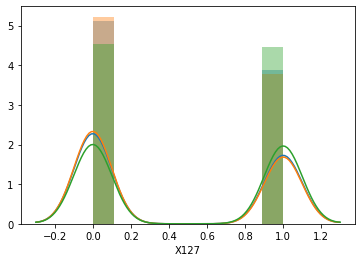

In [96]:
#EDA step6.  From beow plot it is concluded that there is no standardization and outlier treatment
#needed for these features at this point.
sns.distplot(data.X314)
sns.distplot(data.X261)
sns.distplot(data.X127)

In [13]:
# Data Preprocessing
# Step 7.Check for unique values for Categorical columns.Categorical columns(X0,X1,X2,X3,X4,X5,X6,X8)
print('X0 unique',len(data.X0.unique()),'\n')
print('X1 unique',len(data.X1.unique()),'\n')
print('X2 unique',len(data.X2.unique()),'\n')
print('X3 unique',len(data.X3.unique()),'\n')
print('X4 unique',len(data.X4.unique()),'\n')
print('X5 unique',len(data.X5.unique()),'\n')
print('X6 unique',len(data.X6.unique()),'\n')
print('X8 unique',len(data.X8.unique()))
# Apply label encoder.


X0 unique 47 

X1 unique 27 

X2 unique 44 

X3 unique 7 

X4 unique 4 

X5 unique 29 

X6 unique 12 

X8 unique 25


In [14]:
# Data Preprocessing
#lets try label encoding for all the categorical columns 
finalDataset=pd.get_dummies(data)

In [15]:
finalDataset.head()

y  X10  X12  X13  X14  X15  X16  X17  X18  X19  X20  X21  X22  X23  \
0  130.81    0    0    1    0    0    0    0    1    0    0    1    0    0   
1   88.53    0    0    0    0    0    0    0    1    0    0    0    0    0   
2   76.26    0    0    0    0    0    0    1    0    0    0    0    0    0   
3   80.62    0    0    0    0    0    0    0    0    0    0    0    0    0   
4   78.02    0    0    0    0    0    0    0    0    0    0    0    0    0   

   X24  X26  X27  X28  X29  X30  X31  X32  X33  X34  X35  X36  X37  X38  X39  \
0    0    0    0    0    0    0    1    0    0    0    1    0    1    0    0   
1    0    0    1    0    0    0    1    0    0    0    1    0    1    0    0   
2    0    0    1    1    1    0    1    0    0    0    1    0    1    0    0   
3    0    0    1    1    1    0    1    0    0    0    1    0    1    0    0   
4    0    0    1    1    1    0    1    0    0    0    1    0    1    0    0   

   X40  X41  X42  X43  X44  X45  X46  X47  X48  X49  X50  X51  X52  X53  X54  \
0    0    0    0    0    0    0    1    0    0    0    0    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0    0    1    0    0    0   
2    0    0    0    1    0    0    1    0    0    0    0    1    0    0    1   
3    0    0    0    1    0    0    1    0    0    0    0    0    0    0    1   
4    0    0    0    1    0    0    1    0    0    0    0    1    0    0    1   

   X55  X56  X57  X58  X59  X60  X61  X62  X63  X64  X65  X66  X67  X68  X69  \
0    0    0    0    1    0    0    0    0    0    0    0    0    0    1    0   
1    0    0    0    0    0    0    1    0    0    0    0    0    0    0    0   
2    0    0    0    1    0    0    1    0    0    0    0    0    0    1    0   
3    0    0    0    0    0    0    1    0    0    0    0    0    0    0    0   
4    0    0    0    0    0    0    1    0    0    0    0    0    0    0    0   

   X70  X71  X73  X74  X75  X76  X77  X78  X79  X80  X81  X82  X83  X84  X85  \
0    1    0    0    1    0    0    0    0    0    0    0    0    0    0    1   
1    1    0    0    1    0    0    0    0    0    1    0    0    0    0    1   
2    1    1    0    1    1    1    0    0    0    1    0    0    0    1    1   
3    1    1    0    1    0    1    0    0    0    1    0    0    0    1    0   
4    1    0    0    1    0    1    0    0    0    1    0    0    0    0    0   

   X86  X87  X88  X89  X90  X91  X92  X94  X95  X96  X97  X98  X99  X100  \
0    0    0    0    0    0    0    0    0    0    0    0    0    0     0   
1    0    0    0    0    0    0    0    0    0    1    0    1    0     1   
2    0    0    0    0    0    0    0    0    0    1    0    1    0     0   
3    0    0    0    0    0    0    0    0    0    1    0    1    0     0   
4    0    0    0    0    0    0    0    0    0    1    0    1    0     0   

   X101  X102  X103  X104  X105  X106  X108  X109  X110  X111  X112  X113  \
0     0     0     0     0     0     0     0     0     0     1     0     0   
1     1     0     0     0     0     0     0     0     0     1     0     0   
2     1     0     0     0     0     0     0     0     0     1     0     0   
3     1     0     0     0     0     0     1     0     0     1     0     0   
4     1     0     0     0     0     0     1     0     0     1     0     0   

   X114  X115  X116  X117  X118  X119  X120  X122  X123  X124  X125  X126  \
0     1     0     1     0     1     1     1     0     0     0     0     0   
1     0     0     0     0     1     1     1     0     0     0     0     0   
2     0     0     0     0     0     0     1     0     0     0     0     0   
3     1     0     0     0     0     0     1     0     0     0     0     0   
4     1     0     0     0     0     0     1     0     0     0     0     0   

   X127  X128  X129  X130  X131  X132  X133  X134  X135  X136  X137  X138  \
0     0     1     0     0     1     0     0     0     0     1     1     0   
1     1     1     0     0     0     1     0     0     0     1     0     0   
2

In [16]:
# Data Preprocessing
# extract features and label
features=finalDataset.iloc[:,1:].values
label=finalDataset.iloc[:,0].values

### Perform dimensionality reduction (PCA)


In [17]:
# PCA Step1- Perform Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
features=sc.fit_transform(features)

In [18]:
features.shape

(4208, 551)

In [25]:
# PCA Step2
#    Perform initial PCA and extract n Principal Components where n is no of features. Here n=551
#    then check the explained_variance_ratio_ and find out the mean. This mean will be threshold for identifying PC counts
#    Once we have the PC counts, we can recreate PCA object with final PC count

from sklearn.decomposition import PCA,KernelPCA
pca=PCA(n_components=551)
pca.fit(features,label)

PCA(n_components=551)

In [34]:
np.cumsum(pca.explained_variance_ratio_)

array([0.04901614, 0.0901605 , 0.12363178, 0.14928192, 0.17373117,
       0.19671229, 0.2188749 , 0.23608589, 0.2514553 , 0.26613918,
       0.27920587, 0.29206689, 0.30452377, 0.31623423, 0.32725304,
       0.33729473, 0.34693363, 0.35636577, 0.36512608, 0.37369534,
       0.38203649, 0.39006528, 0.39774411, 0.40528007, 0.41256598,
       0.41954099, 0.42621129, 0.43273399, 0.43903046, 0.44508254,
       0.45104966, 0.45688313, 0.46264397, 0.46836677, 0.47399498,
       0.47952221, 0.48490344, 0.49020272, 0.49538103, 0.50041498,
       0.5053824 , 0.51016805, 0.51492499, 0.519599  , 0.52416044,
       0.52864051, 0.53307097, 0.53741071, 0.54168912, 0.54592029,
       0.55012487, 0.55429759, 0.55838423, 0.56244742, 0.56643146,
       0.57036376, 0.57427263, 0.57813076, 0.58196526, 0.58576427,
       0.58954505, 0.59330155, 0.59697074, 0.6006054 , 0.60420654,
       0.60775618, 0.61125203, 0.61467561, 0.61808668, 0.62139631,
       0.62466774, 0.6278854 , 0.63105096, 0.63418995, 0.63729

In [65]:
#lets try kernel pca
from sklearn.decomposition import KernelPCA
kpca=KernelPCA(n_components=551,kernel='rbf')
kpca.fit(features,label)

KernelPCA(kernel='rbf', n_components=551)

In [19]:
#Find out the threshold explained_variance_ratio_
np.mean(pca.explained_variance_ratio_)

0.0018148820326678765

In [20]:
# Based on above threshold ,count the number of PC which satisfies the threshold (>threshold)
# Here the threshold is > 0.0018148820326678765
df=pd.DataFrame((pca.explained_variance_ratio_),columns=['pca'])
df[df.pca > 0.0018148820326678765].size

157

In [85]:
#. Recreate PCA object with final PC count of 157
pca=PCA(n_components=157)
pca.fit(features,label)


PCA(n_components=157)

In [82]:
finalFeatures=pca.fit_transform(features)
finalFeatures

array([[ 1.31763552e+01, -2.70106713e+00, -1.47407699e+00, ...,
        -1.70299931e-02,  7.67275523e-02,  5.62109907e-03],
       [ 1.65686575e-01,  4.70427592e-01,  7.14641202e-01, ...,
        -6.82464357e-01, -3.59981146e-02, -1.58349980e+00],
       [ 1.00768777e+01,  2.31304388e+01, -5.70706221e+00, ...,
         3.62301399e-01,  4.04433286e+00,  7.57393421e-01],
       ...,
       [ 1.06620135e-01,  7.30210638e-01,  3.64905364e+00, ...,
         7.42499006e-02, -1.72365000e-01,  1.96007485e-01],
       [-1.58559628e+00,  7.19096513e-01, -7.14797803e-01, ...,
        -5.21848043e-01, -1.51319799e+00,  2.84639607e+00],
       [-1.95381274e+00, -1.16621441e+00, -8.07651229e-01, ...,
        -1.50007592e-01,  1.43933157e-01, -4.36525256e-01]])

In [46]:
np.cumsum(pca.explained_variance_ratio_)

array([0.04901614, 0.0901605 , 0.12363178, 0.14928192, 0.17373117,
       0.19671229, 0.2188749 , 0.23608589, 0.2514553 , 0.26613918,
       0.27920587, 0.29206689, 0.30452377, 0.31623423, 0.32725304,
       0.33729473, 0.34693362, 0.35636577, 0.36512607, 0.37369533,
       0.38203647, 0.39006526, 0.39774408, 0.40528004, 0.41256593,
       0.41954092, 0.42621121, 0.43273388, 0.43903032, 0.44508234,
       0.45104937, 0.45688278, 0.46264354, 0.46836619, 0.47399433,
       0.47952147, 0.48490247, 0.49020162, 0.49537961, 0.50041341,
       0.50538056, 0.51016598, 0.51492267, 0.51959629, 0.52415744,
       0.52863714, 0.53306711, 0.53740607, 0.54168386, 0.54591453,
       0.55011827, 0.55429   , 0.55837581, 0.56243796, 0.5664209 ,
       0.57035212, 0.57425997, 0.57811709, 0.5819502 , 0.58574764,
       0.58952709, 0.59328236, 0.59694993, 0.60058127, 0.60418084,
       0.60772778, 0.61122174, 0.61463988, 0.61804623, 0.62134929,
       0.62461755, 0.62783128, 0.63099322, 0.6341278 , 0.63722

In [23]:
finalFeatures.shape

(4208, 157)

In [227]:
# Now we have features and label ready for model building and testing

In [83]:
%%time
#Model building and Training using XGBoost
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

for i in range(1,50):
    
    X_train,X_test,y_train,y_test=train_test_split(finalFeatures,label,test_size=0.2,random_state=i)
    model=XGBRegressor()
    model.fit(X_train,y_train)
    train_score=model.score(X_train,y_train)
    test_score=model.score(X_test,y_test)
    if test_score > train_score:
        print('test_score is {}: train_score is {}: for seed {}'.format(test_score,train_score,i))
    


Wall time: 6min 44s


In [32]:
%%time
# from above different random state test, it is found that test_score is less than train score.
# there is no generalized model at this point of time.
#Lets see how much of maximum test score we can obtain at this point of time without any further optimization.
for i in range(1,50):
    
    X_train,X_test,y_train,y_test=train_test_split(finalFeatures,label,test_size=0.2,random_state=i)
    model=XGBRegressor()
    model.fit(X_train,y_train)
    train_score=model.score(X_train,y_train)
    test_score=model.score(X_test,y_test)
    #if test_score > train_score:
    print('test_score is {}: train_score is {}: for seed {}'.format(test_score,train_score,i))

test_score is 0.3785438274655957: train_score is 0.9779959339530501: for seed 1
test_score is 0.4274997140857384: train_score is 0.9730811357280339: for seed 2
test_score is 0.41991824627618135: train_score is 0.9735626418089413: for seed 3
test_score is 0.42146424503701274: train_score is 0.9720794356336963: for seed 4
test_score is 0.4650694795592025: train_score is 0.9726743953743551: for seed 5
test_score is 0.43238917464558724: train_score is 0.9744237131238026: for seed 6
test_score is 0.3690588211067849: train_score is 0.9781427969827041: for seed 7
test_score is 0.4087010988946681: train_score is 0.9774957198508251: for seed 8
test_score is 0.40504271352620036: train_score is 0.9774801912456523: for seed 9
test_score is 0.46984793203717223: train_score is 0.9767822519558507: for seed 10
test_score is 0.455502476681497: train_score is 0.9740579593008127: for seed 11
test_score is 0.3635486775595963: train_score is 0.9728923876029977: for seed 12
test_score is 0.39132090561201327

In [84]:
# from above random_state sampling test it is found that we can obtain the best test score of 49% for random_state 47
# lets try to refit the model with random state 47
X_train,X_test,y_train,y_test=train_test_split(finalFeatures,label,test_size=0.2,random_state=47)
modelXGB=XGBRegressor()
modelXGB.fit(X_train,y_train)
train_score=modelXGB.score(X_train,y_train)
test_score=modelXGB.score(X_test,y_test)
print('test_score is {}: train_score is {}: for seed {}'.format(test_score,train_score,47))

test_score is 0.5067926585201417: train_score is 0.9756542923546492: for seed 47


### Lets prepare the test data for prediction


In [68]:
testData=pd.read_csv('test.csv')

In [69]:
# Check for null values from Info() and duplicated value as below
testData[testData.duplicated()==True]

Empty DataFrame
Columns: [ID, X0, X1, X2, X3, X4, X5, X6, X8, X10, X11, X12, X13, X14, X15, X16, X17, X18, X19, X20, X21, X22, X23, X24, X26, X27, X28, X29, X30, X31, X32, X33, X34, X35, X36, X37, X38, X39, X40, X41, X42, X43, X44, X45, X46, X47, X48, X49, X50, X51, X52, X53, X54, X55, X56, X57, X58, X59, X60, X61, X62, X63, X64, X65, X66, X67, X68, X69, X70, X71, X73, X74, X75, X76, X77, X78, X79, X80, X81, X82, X83, X84, X85, X86, X87, X88, X89, X90, X91, X92, X93, X94, X95, X96, X97, X98, X99, X100, X101, X102, ...]
Index: []

In [71]:
# This is an optional step
#     Dropping the columns which are dropped in Train Data set to make sure both train and test data has the same number of columns
#testData.drop(columns=['ID','X11','X93','X107','X233','X235','X268','X289','X290','X293','X297','X330','X347'],inplace=True)

In [72]:
#Apply label encoding on Test data for all the categorical columns 
testDataLE=pd.get_dummies(testData)
testDataLE.head()

X10  X12  X13  X14  X15  X16  X17  X18  X19  X20  X21  X22  X23  X24  X26  \
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1    0    0    0    0    0    0    0    0    1    0    0    0    0    0    0   
2    0    0    0    1    0    0    0    0    0    0    0    0    0    0    0   
3    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
4    0    0    0    1    0    0    0    0    0    0    0    0    0    0    0   

   X27  X28  X29  X30  X31  X32  X33  X34  X35  X36  X37  X38  X39  X40  X41  \
0    1    1    1    0    1    0    0    0    1    0    1    0    0    0    0   
1    1    0    0    0    1    0    0    0    1    0    1    0    0    0    0   
2    1    0    1    0    1    0    0    0    1    0    1    0    0    0    0   
3    1    1    1    0    1    0    0    0    1    0    1    0    0    0    0   
4    1    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

   X42  X43  X44  X45  X46  X47  X48  X49  X50  X51  X52  X53  X54  X55  X56  \
0    0    1    0    0    1    0    0    0    0    0    0    0    1    0    0   
1    0    0    0    1    1    0    0    1    1    1    0    0    0    0    0   
2    0    0    0    0    0    0    0    0    0    1    0    0    1    0    0   
3    0    1    0    0    1    0    0    0    0    0    0    0    1    0    0   
4    0    0    0    0    0    0    0    0    0    1    0    0    0    0    0   

   X57  X58  X59  X60  X61  X62  X63  X64  X65  X66  X67  X68  X69  X70  X71  \
0    0    0    0    0    1    0    0    0    0    0    0    0    0    1    0   
1    0    1    0    0    1    0    0    0    0    0    0    0    0    1    0   
2    0    1    0    0    1    0    0    0    0    0    0    0    0    1    0   
3    0    0    0    0    1    0    0    0    0    0    0    0    0    1    0   
4    0    1    0    0    1    0    0    1    0    0    0    0    0    1    0   

   X73  X74  X75  X76  X77  X78  X79  X80  X81  X82  X83  X84  X85  X86  X87  \
0    0    1    0    1    0    0    0    1    0    0    0    0    0    0    0   
1    0    1    0    0    0    0    0    1    0    0    0    0    0    0    0   
2    0    1    0    1    0    0    0    1    0    0    0    0    1    0    0   
3    0    1    0    1    0    0    0    1    0    0    0    0    0    0    0   
4    0    1    0    0    0    0    0    1    0    0    0    0    1    0    0   

   X88  X89  X90  X91  X92  X94  X95  X96  X97  X98  X99  X100  X101  X102  \
0    0    0    0    0    0    0    0    1    0    1    0     0     1     0   
1    0    0    0    0    0    0    0    0    0    1    0     0     1     0   
2    0    0    0    0    0    0    0    1    0    1    0     1     1     0   
3    0    0    0    0    0    0    0    1    0    1    0     0     1     0   
4    0    0    0    0    0    0    0    1    0    1    0     1     1     0   

   X103  X104  X105  X106  X108  X109  X110  X111  X112  X113  X114  X115  \
0     0     0     0     0     0     0     0     1     0     0     1     0   
1     1     0     0     0     0     0     0     1     0     0     0     0   
2     1     0     0     0     0     0     0     1     0     0     0     0   
3     0     0     0     0     0     0     0     1     0     0     1     0   
4     1     0     0     1     0     0     0     1     0     0     0     0   

   X116  X117  X118  X119  X120  X122  X123  X124  X125  X126  X127  X128  \
0     0     0     0     0     0     0     0     0     0     0     0     1   
1     1     0     1     1     1     0     0     0     0     0     1     1   
2     0     0     0     0     1     0     0     0     0     0     0     1   
3     0     0     0     0     1     0     0     0     0     0     0     1   
4     0     0     1     1     1     0     0     0     0     0     0     1   

   X129  X130  X131  X132  X133  X134  X135  X136  X137  X138  X139  X140  \
0     0     0     0     1     0     0     0     0     0     0     0     0   
1     1     0     0     0     1     0     0     1

In [73]:
#Apply Feature scaling and Feature reduction(PCA) on Test Data with same PC value(=157) as that of train data.
# This is to make sure both train feature data and Testdataset has the same structure.
from sklearn.preprocessing import StandardScaler
scTest=StandardScaler()
testDataLE=scTest.fit_transform(testDataLE)

testDataLE.shape

(4209, 557)

In [74]:
from sklearn.decomposition import PCA
pcTest=PCA(n_components=157)
finalTestData=pcTest.fit_transform(testDataLE)

finalTestData.shape

(4209, 157)

### Predict  test_df values using xgboost


In [79]:
y_pred=modelXGB.predict(finalTestData)
testData['y']=pd.DataFrame(y_pred)
testData.head()

X0 X1  X2 X3 X4 X5 X6 X8  X10  X12  X13  X14  X15  X16  X17  X18  X19  X20  \
0  az  v   n  f  d  t  a  w    0    0    0    0    0    0    0    0    0    0   
1   t  b  ai  a  d  b  g  y    0    0    0    0    0    0    0    0    1    0   
2  az  v  as  f  d  a  j  j    0    0    0    1    0    0    0    0    0    0   
3  az  l   n  f  d  z  l  n    0    0    0    0    0    0    0    0    0    0   
4   w  s  as  c  d  y  i  m    0    0    0    1    0    0    0    0    0    0   

   X21  X22  X23  X24  X26  X27  X28  X29  X30  X31  X32  X33  X34  X35  X36  \
0    0    0    0    0    0    1    1    1    0    1    0    0    0    1    0   
1    0    0    0    0    0    1    0    0    0    1    0    0    0    1    0   
2    0    0    0    0    0    1    0    1    0    1    0    0    0    1    0   
3    0    0    0    0    0    1    1    1    0    1    0    0    0    1    0   
4    0    0    0    0    0    1    0    0    0    0    0    0    0    0    0   

   X37  X38  X39  X40  X41  X42  X43  X44  X45  X46  X47  X48  X49  X50  X51  \
0    1    0    0    0    0    0    1    0    0    1    0    0    0    0    0   
1    1    0    0    0    0    0    0    0    1    1    0    0    1    1    1   
2    1    0    0    0    0    0    0    0    0    0    0    0    0    0    1   
3    1    0    0    0    0    0    1    0    0    1    0    0    0    0    0   
4    0    0    0    0    0    0    0    0    0    0    0    0    0    0    1   

   X52  X53  X54  X55  X56  X57  X58  X59  X60  X61  X62  X63  X64  X65  X66  \
0    0    0    1    0    0    0    0    0    0    1    0    0    0    0    0   
1    0    0    0    0    0    0    1    0    0    1    0    0    0    0    0   
2    0    0    1    0    0    0    1    0    0    1    0    0    0    0    0   
3    0    0    1    0    0    0    0    0    0    1    0    0    0    0    0   
4    0    0    0    0    0    0    1    0    0    1    0    0    1    0    0   

   X67  X68  X69  X70  X71  X73  X74  X75  X76  X77  X78  X79  X80  X81  X82  \
0    0    0    0    1    0    0    1    0    1    0    0    0    1    0    0   
1    0    0    0    1    0    0    1    0    0    0    0    0    1    0    0   
2    0    0    0    1    0    0    1    0    1    0    0    0    1    0    0   
3    0    0    0    1    0    0    1    0    1    0    0    0    1    0    0   
4    0    0    0    1    0    0    1    0    0    0    0    0    1    0    0   

   X83  X84  X85  X86  X87  X88  X89  X90  X91  X92  X94  X95  X96  X97  X98  \
0    0    0    0    0    0    0    0    0    0    0    0    0    1    0    1   
1    0    0    0    0    0    0    0    0    0    0    0    0    0    0    1   
2    0    0    1    0    0    0    0    0    0    0    0    0    1    0    1   
3    0    0    0    0    0    0    0    0    0    0    0    0    1    0    1   
4    0    0    1    0    0    0    0    0    0    0    0    0    1    0    1   

   X99  X100  X101  X102  X103  X104  X105  X106  X108  X109  X110  X111  \
0    0     0     1     0     0     0     0     0     0     0     0     1   
1    0     0     1     0     1     0     0     0     0     0     0     1   
2    0     1     1     0     1     0     0     0     0     0     0     1   
3    0     0     1     0     0     0     0     0     0     0     0     1   
4    0     1     1     0     1     0     0     1     0     0     0     1   

   X112  X113  X114  X115  X116  X117  X118  X119  X120  X122  X123  X124  \
0     0     0     1     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     1     0     1     1     1     0     0     0   
2     0     0     0     0     0     0     0     0     1     0     0     0   
3     0     0     1     0     0     0     0     0     1     0     0     0   
4     0     0     0     0     0     0     1     1     1     0     0     0   

   X125  X126  X127  X128  X129  X130  X131  X132  X133  X134  X135  X136  \
0     0     0     0     1     0     0     0     1     0     0     0     0   
1     0     0     1     1     1     0

In [80]:
testData.to_csv('predicted_output.csv')

### Summary and Conclusion at the end of phase-1 of Project
    After dimensionality reduction , 157 principal component has been found
    XGBoost model training score is  97 % for and Test Score 49% for random state 47
    49% test score is not good enough performance of the model. 
#### We can now go for below approaches as phase-2 of the the project task ( To be contd...)
    1. Apply Kernel PCA and see if the score can be improved
    2. Apply cross validation and hyper parameter tuning on XGboost